In [12]:
%matplotlib inline
import pymongo
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import loop

### walshPercentEffectRemainingAtTime
     Returns the percentage of total insulin effect remaining at a specified interval after delivery; also known as Insulin On Board (IOB).

     These are 4th-order polynomial fits of John Walsh's IOB curve plots, and they first appeared in GlucoDyn.

     See: https://github.com/kenstack/GlucoDyn

     - parameter time:           The interval (in hours) after insulin delivery
     - parameter actionDuration: The total time of insulin effect (in hours)

     - returns: The percentage of total insulin effect remaining

In [3]:

def walsh_percent_effect_remaining_at_time(time, action_duration):
    if t <= 0:
        return 1
    elif t >= action_duration:
        return 0
    
    nearest_modeled_duration = None
   
    if action_duration < 3:
        nearest_modeled_duration = 3
    elif action_duration > 6:
        nearest_modeled_duration = 6
    else: 
        nearest_modeled_duration = round(action_duration)
    
    minutes = (time*60) * nearest_modeled_duration / action_duration
    
    if nearest_modeled_duration == 3:
        return -3.2030e-9 * pow(minutes, 4) + 1.354e-6 * pow(minutes, 3) - 1.759e-4 * pow(minutes, 2) + 9.255e-4 * minutes + 0.99951
    elif nearest_modeled_duration == 4:
        return -3.310e-10 * pow(minutes, 4) + 2.530e-7 * pow(minutes, 3) - 5.510e-5 * pow(minutes, 2) - 9.086e-4 * minutes + 0.99950
    elif nearest_modeled_duration == 5:
        return -2.950e-10 * pow(minutes, 4) + 2.320e-7 * pow(minutes, 3) - 5.550e-5 * pow(minutes, 2) + 4.490e-4 * minutes + 0.99300
    elif nearest_modeled_duration == 6:
        return -1.493e-10 * pow(minutes, 4) + 1.413e-7 * pow(minutes, 3) - 4.095e-5 * pow(minutes, 2) + 6.365e-4 * minutes + 0.99700
    else:
        raise Exception('Invalid!')
    

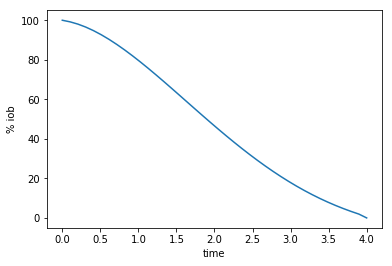

In [43]:
x = np.linspace(0,4,num=40)
y = [walsh_percent_effect_remaining_at_time(t,4) * 100 for t in x]
plt.plot(x, y)
plt.xlabel('time')
plt.ylabel('% iob')
plt.show()

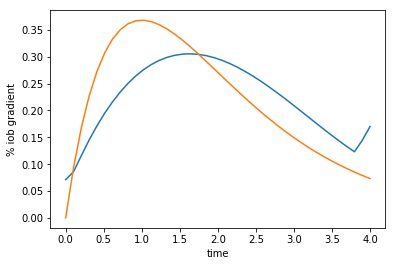

8.88487710873
8.88473176268


In [60]:
yp = np.gradient(np.array(y)/11.41)
plt.plot(x, -yp)


y_new = [t*math.exp(-t/1) for t in x]
plt.plot(x, y_new)

plt.xlabel('time')
plt.ylabel('% iob gradient')
plt.show()

print (-yp).sum()
print (np.array(y_new)).sum()

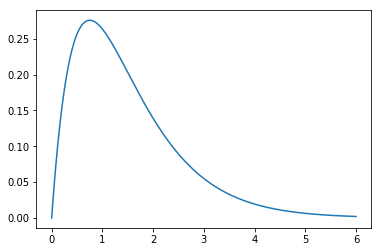

In [98]:
x = np.linspace(0,6,num=600)
y_new = [t*math.exp(-t/0.75) for t in x]
plt.plot(x, y_new)

In [99]:
d = 3 * 60
x = 0.05
tau = -d / math.log(x/d)
tau

21.98154030083751